In [18]:
import numpy as np
from itertools import product, permutations
from tqdm.notebook import tqdm
from multiprocessing import Pool
from GroupingAlgorithms import grouping
import matplotlib.pyplot as plt
from math import factorial
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
def sort_solution(data):
    """
    Function to sort the data obtained for a parallel computation
    :param data: (list) List in which each entry represents one solution of the parallel computation. The elements are
    also list which contains in the first element the index and in the second one the result of the computation.
    :return: (list) List with the data sorted
    """
    n = len(data)  # Extract the number of computations done
    sorted_sol = [None] * n  # Empty list with the correct number of elements
    for i in range(n):  # Iterate over all the elements
        index = data[i][0]  # Obtain the index of the result
        temp = data[i][1]  # Obtain the result
        sorted_sol[index] = temp  # Save the result in the correct element
        
    if type(sorted_sol[0]) == list or type(sorted_sol[0]) == tuple:
        return sorted_sol
    else:
        return np.array(sorted_sol)
    
def unpack_functions(pack):
    if len(pack) < 4:
        pack.append({})
    return [pack[0], pack[1](*pack[2], **pack[3])]
    
def n_groups(seed):
    np.random.seed(seed)
    np.random.shuffle(order)
    Groups, _ = grouping(PS[order],[9,8,7,6,5,4,3,2,1],WC)
    return len(Groups)

In [20]:
num_qubits = 4
WC=list(range(num_qubits))
WC=list(permutations(list(range(num_qubits)),2))

PS = np.array(list(product([0,1,2,3],repeat=num_qubits)))
order = np.arange(num_qubits ** 4)

In [21]:
n = 10000
args = []
results = []
start=time.time()

for i in range(n):
    args.append([i, n_groups, [i]])
    
pbar = tqdm(total=n)
pool = Pool()
for i, result in enumerate(pool.imap_unordered(unpack_functions, args, chunksize=1), 1): 
        results.append(result) # Save the result
        pbar.update() #Update the progress bar
        
pool.terminate()
pbar.close()
results = np.array(sort_solution(results)) # Sort the asyn results
print(time.time()-start)
print('Minimum number of groups:', min(results))
print('Maximum number of groups:', max(results))


487.5979940891266
Minimum number of groups: 37
Maximum number of groups: 48


In [22]:
pool.terminate()

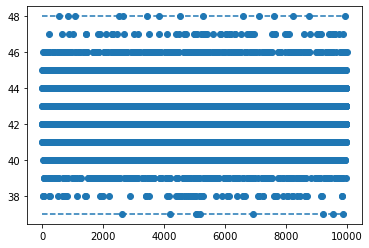

In [23]:
plt.plot(results, 'o')
plt.hlines(min(results), 0, n, ls='--')
plt.hlines(max(results), 0, n, ls='--')

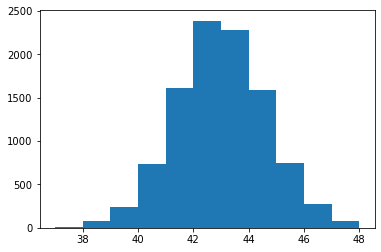

In [24]:
num_bins = max(results) - min(results)
plt.hist(results, num_bins);